In [1]:
import pandas as pd 
df = pd.read_csv(r'C:\Users\dasc5\Downloads\Summer-Olympic-medals-1976-to-2008\Data\Summer-Olympic-medals-1976-to-2008.csv', encoding='latin1')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print(df.head())
print(df.info())
print(df.head())
print(df.columns)

       City    Year     Sport Discipline           Event  \
0  Montreal  1976.0  Aquatics     Diving  3m springboard   
1  Montreal  1976.0  Aquatics     Diving  3m springboard   
2  Montreal  1976.0  Aquatics     Diving  3m springboard   
3  Montreal  1976.0  Aquatics     Diving  3m springboard   
4  Montreal  1976.0  Aquatics     Diving    10m platform   

                    Athlete Gender Country_Code        Country Event_gender  \
0         Kï¿½HLER, Christa  Women          GDR   East Germany            W   
1       KOSENKOV, Aleksandr    Men          URS   Soviet Union            M   
2      BOGGS, Philip George    Men          USA  United States            M   
3  CAGNOTTO, Giorgio Franco    Men          ITA          Italy            M   
4    WILSON, Deborah Keplar  Women          USA  United States            W   

    Medal  
0  Silver  
1  Bronze  
2    Gold  
3  Silver  
4  Bronze  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (to

In [2]:
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB
None
City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Event_gender    117
Medal           117
dtype: int64


In [3]:
df = df.drop(['Event_gender', 'Country_Code'], axis=1)
df = df.dropna(how='all')
df = df.astype({'Year': 'int'})
print(df.isnull().sum())


City          0
Year          0
Sport         0
Discipline    0
Event         0
Athlete       0
Gender        0
Country       0
Medal         0
dtype: int64


In [4]:
print(df[['City', 'Year']].drop_duplicates()['City'].value_counts())

City
Montreal       1
Moscow         1
Los Angeles    1
Seoul          1
Barcelona      1
Atlanta        1
Sydney         1
Athens         1
Beijing        1
Name: count, dtype: int64


In [5]:
medals = df.groupby(['Year', 'Country', 'Medal']).size().unstack().fillna(0)
medals['Total'] = medals.sum(axis=1)
print(medals.head())


Medal           Bronze  Gold  Silver  Total
Year Country                               
1976 Australia     8.0   0.0    16.0   24.0
     Austria       1.0   0.0     0.0    1.0
     Belgium       6.0   0.0     3.0    9.0
     Bermuda*      1.0   0.0     0.0    1.0
     Brazil        3.0   0.0     0.0    3.0


          Country  Medal_Count
0   United States         1992
1    Soviet Union         1021
2       Australia          798
3         Germany          691
4           China          679
5          Russia          638
6    East Germany          626
7           Italy          486
8         Romania          482
9  United Kingdom          467


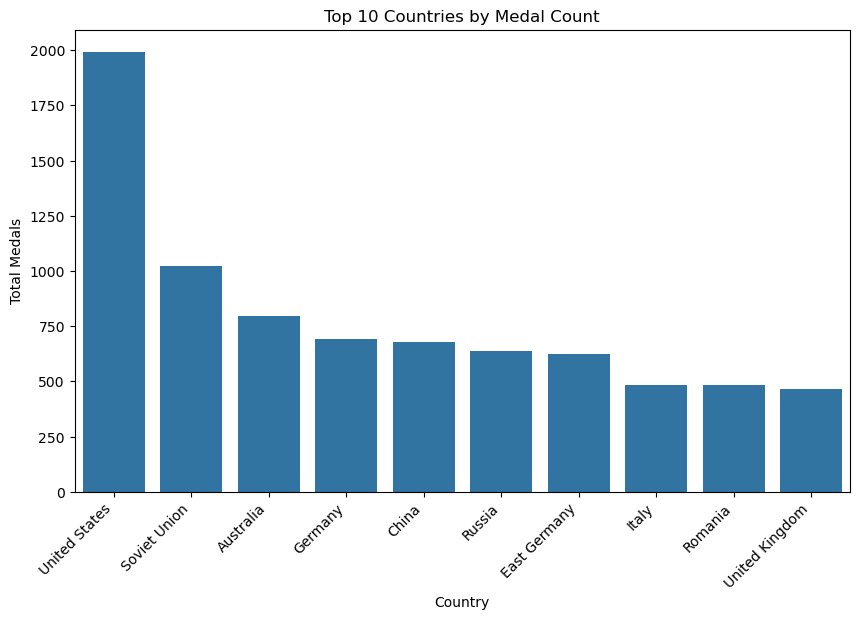

In [6]:
# Calculate medal counts per country
medal_counts_by_country = df['Country'].value_counts().reset_index()
medal_counts_by_country.columns = ['Country', 'Medal_Count']

# Display the top 10 countries
top_10_countries = medal_counts_by_country.head(10)
print(top_10_countries)

# Visualize top 10 countries by medal count
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Medal_Count', data=top_10_countries)
plt.title('Top 10 Countries by Medal Count')
plt.xlabel('Country')
plt.ylabel('Total Medals')
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels
plt.show()

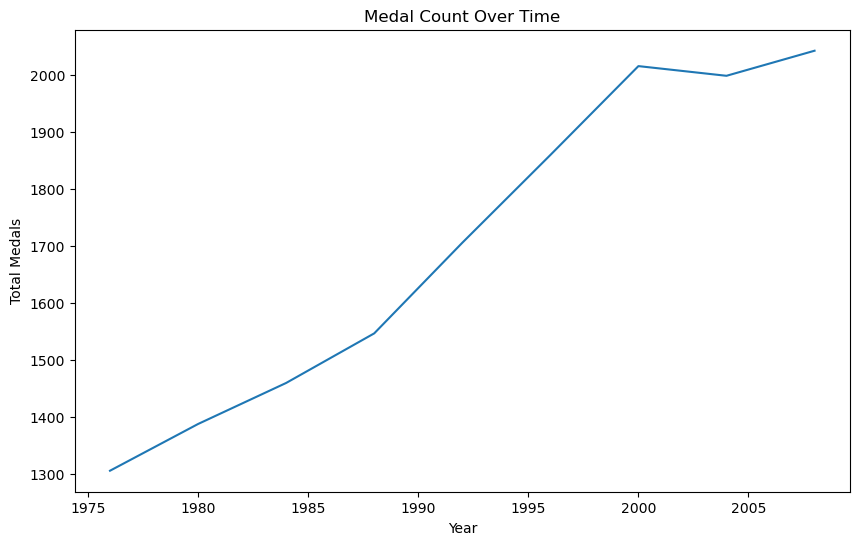

In [7]:
# Calculate medals won per year
medals_by_year = df.groupby('Year')['Medal'].count().reset_index()

# Visualize the trend
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Medal', data=medals_by_year)
plt.title('Medal Count Over Time')
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.show()

Gender
Men      9388
Women    5928
Name: count, dtype: int64


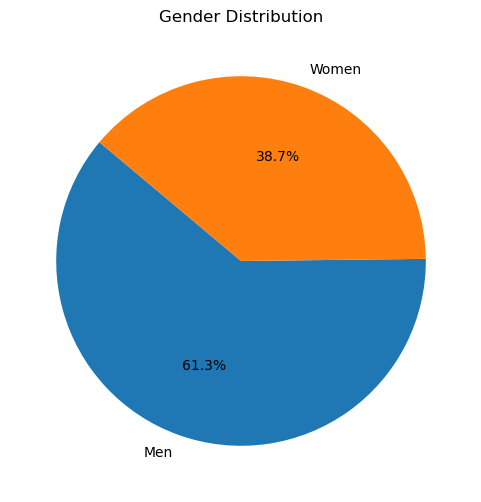

In [8]:
# Count the occurrences of each gender
gender_counts = df['Gender'].value_counts()
print(gender_counts)

# Visualize gender distribution
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.show()

                  Athlete  Medal_Count
0         PHELPS, Michael           16
1      ANDRIANOV, Nikolay           12
2           NEMOV, Alexei           12
3         FISCHER, Birgit           12
4            TORRES, Dara           12
5         THOMPSON, Jenny           12
6       COUGHLIN, Natalie           11
7         BIONDI, Matthew           11
8  VAN ALMSICK, Franziska           10
9         SCHERBO, Vitaly           10


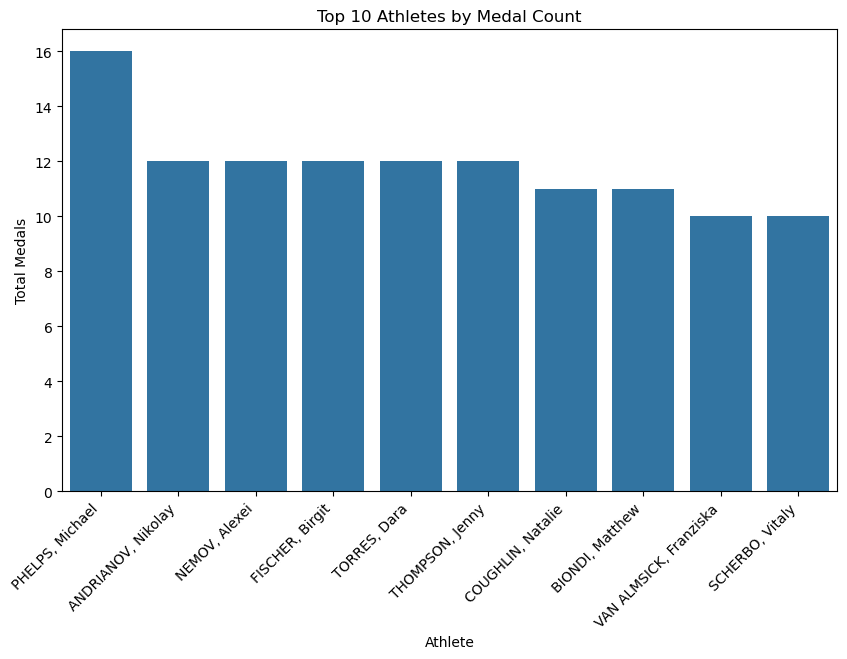

In [9]:
# Calculate medal counts per athlete
medal_counts_by_athlete = df['Athlete'].value_counts().reset_index()
medal_counts_by_athlete.columns = ['Athlete', 'Medal_Count']

# Display the top 10 athletes
top_10_athletes = medal_counts_by_athlete.head(10)
print(top_10_athletes)

# Visualize top 10 athletes
plt.figure(figsize=(10, 6))
sns.barplot(x='Athlete', y='Medal_Count', data=top_10_athletes)
plt.title('Top 10 Athletes by Medal Count')
plt.xlabel('Athlete')
plt.ylabel('Total Medals')
plt.xticks(rotation=45, ha="right")
plt.show()